# Download the Data 
Keep this if you are working in Google Colab. Delete this if you are working on your own computer and have the data downloaded already. 

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3' -O lendingclub.csv

--2021-11-01 22:07:12--  https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3
Resolving docs.google.com (docs.google.com)... 173.194.202.102, 173.194.202.101, 173.194.202.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bcakutoaslao37td806thc2u5dp649th/1635804375000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download [following]
--2021-11-01 22:07:12--  https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bcakutoaslao37td806thc2u5dp649th/1635804375000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download
Resolving doc-10-5c-docs.googleusercontent.com (doc-10-5c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting 

# Homework 2 
For last assignment, you trained a machine learning classifier to predict borrower success rates on LendingClub.com, using a set of features that were already present in the dataset. This week you will spend time optimizing that model.

Feel free to reuse code from your first homework submission; this does not need to be done from scratch.

# Question 1

Choose **TWO** of the following three options:

   - Option 1: The `state` column is currently broken into 51 distinct values. Create a new feature, `region`, that groups similar states together.
   - Option 2: The `emp_length` column is currently a nominal value. Create a new feature, `emp_length_numeric`, that treats the variable as a numeric value instead.
   - Option 3: The `title` column is a free-form string and is currently hard or impossible to use as a feature. Define one or more features that capture information about the type of loan being applied for, based on the contents of the title.

For the options you have chosen, compare how switching to your new feature in a decision tree model improves or worsens performance compared to using the original representation. Report your quantitative results along with an explanation of your new feature's possible values.

##**Pre-processing: Train and fit reference model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("lendingclub.csv")

In [ ]:
#Define the data to be used
X = df.loc[:, ["amount", "fico", "dti"]]
y = df.policy_code

#Split the data into testing and training groups, with 30% designated as test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

In [ ]:
#Establish baseline metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the reference model is {accuracy}.")
print(f"The precision of the reference model is {precision}.")
print(f"The recall of the reference model is {recall}.")
print(f"The specificity of the reference model is {specificity}.")
print(f"The F1 score of the reference model is {f1score}.")

The accuracy of the reference model is 0.91.
The precision of the reference model is 0.6.
The recall of the reference model is 0.62.
The specificity of the reference model is 0.95.
The F1 score of the reference model is 0.61.


##**Option One**


In [ ]:
#Get a list of the unique values in the state column
df.state.unique()

array(['GA', 'CA', 'FL', 'NJ', 'PA', 'MN', 'KS', 'LA', 'OR', 'MD', 'AR',
       'AZ', 'CO', 'MT', 'MA', 'NY', 'IL', 'TX', 'WA', 'KY', 'OH', 'WI',
       'NC', 'CT', 'MI', 'SC', 'VA', 'WV', 'RI', 'AL', 'NV', 'MO', 'OK',
       'UT', 'AK', 'HI', 'VT', 'NH', 'NM', 'SD', 'DE', 'DC', 'WY', 'MS',
       'ID', 'TN', 'IN', 'ME', 'IA', 'NE', 'ND'], dtype=object)

In [ ]:
#Define regions and divvy unique state values into them
#Note: I'm using the USDA definitions https://www.ars.usda.gov/people-locations/find-a-location/

midwest = ['MN', 'WI', 'MI', 'IA', 'MO', 'IL', 'IN', 'OH', 'KY']
northeast = ['NJ', 'PA', 'MD', 'ME', 'DE', 'DC', 'VT', 'MA', 'NY', 'CT', 'VA', 'WV', 'RI', 'NH', ]
pacific_west = ['WA','OR', 'ID', 'CA', 'NV', 'UT', 'AZ', 'AK', 'HI']
plains = ['MT', 'ND', 'SD', 'WY', 'NE', 'CO', 'KS', 'NM', 'TX', 'OK']
southeast = ['GA', 'FL', 'LA', 'AR','NC', 'SC', 'AL', 'MS','TN']

In [ ]:
df.columns

Index(['amount', 'date', 'title', 'fico', 'dti', 'zip', 'state', 'emp_length',
       'policy_code', 'year', 'outcome'],
      dtype='object')

In [ ]:
#assign each row a region based on its "state" value and add to a new column, "region"

region = []

for i in np.arange(len(df.state)):
  if df.iloc[i, 6] in midwest:
    region.append("midwest")
  elif df.iloc[i, 6] in northeast:
    region.append("northeast")
  elif df.iloc[i, 6] in pacific_west:
    region.append("pacific_west") 
  elif df.iloc[i, 6] in plains:
    region.append("plains")
  elif df.iloc[i, 6] in southeast:
    region.append("southeast")
  else:
    print("Something went wrong!")

df["region"] = region

In [ ]:
#Split nominal value of region into binary dummy variables
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

# create a dataframe with just the regions
region_options = df.region.unique()
regions_df = pd.DataFrame(region_options, columns=['region'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(regions_df, columns=["region"], prefix=["Region_is"] )
# merge to create a dataframe with regions and corresponding dummy variable values
regions_df = regions_df.join(dum_df)
regions_df.head()

,region,Region_is_midwest,Region_is_northeast,Region_is_pacific_west,Region_is_plains,Region_is_southeast
0,southeast,0,0,0,0,1
1,pacific_west,0,0,1,0,0
2,northeast,0,1,0,0,0
3,midwest,1,0,0,0,0
4,plains,0,0,0,1,0


In [ ]:
#add dummy variables to main dataframe
df = df.merge(regions_df)

In [ ]:
#Confirm dummy variable values were assigned correctly
df.groupby("region").mean()

,amount,fico,dti,policy_code,year,Region_is_midwest,Region_is_northeast,Region_is_pacific_west,Region_is_plains,Region_is_southeast
region,,,,,,,,,,
midwest,12679.292032,603.278687,398.984974,0.095133,2011.047861,1,0,0,0,0
northeast,12975.469979,606.376482,608.102721,0.120368,2011.083228,0,1,0,0,0
pacific_west,13426.288003,612.787803,540.885404,0.138623,2011.112020,0,0,1,0,0
plains,13347.944703,609.272503,227.025780,0.109836,2011.117329,0,0,0,1,0
southeast,12424.504545,583.737455,633.440088,0.097152,2011.128000,0,0,0,0,1


In [ ]:
#Get the names of the region columns to add some to the data to be used

df.columns

Index(['amount', 'date', 'title', 'fico', 'dti', 'zip', 'state', 'emp_length',
       'policy_code', 'year', 'outcome', 'region', 'Region_is_midwest',
       'Region_is_northeast', 'Region_is_pacific_west', 'Region_is_plains',
       'Region_is_southeast'],
      dtype='object')

In [ ]:
#Add the region columns to the data to be used
X2 = df.loc[:, ["amount", "fico", "dti", 'Region_is_midwest',
       'Region_is_northeast', 'Region_is_pacific_west', 'Region_is_plains',
       'Region_is_southeast']]
y2 = df.policy_code

#Split the data into testing and training groups, with 30% designated as test data
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=1, stratify=y2)

clf2 = DecisionTreeClassifier(max_depth=10)
clf2 = clf2.fit(X2_train,y2_train)

In [ ]:
#Generate metrics

predictions2 = clf2.predict(X2_test)
cm2 = confusion_matrix(y2_test, predictions2)

tp = cm2[1, 1]
tn = cm2[0, 0]
fn = cm2[1, 0]
fp = cm2[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model after adding regions is {accuracy}.")
print(f"The precision of the model after adding regions is {precision}.")
print(f"The recall of the model after adding regions is {recall}.")
print(f"The specificity of the model after adding regions is {specificity}.")
print(f"The F1 score of the model after adding regions is {f1score}.")

The accuracy of the model after adding regions is 0.91.
The precision of the model after adding regions is 0.61.
The recall of the model after adding regions is 0.62.
The specificity of the model after adding regions is 0.95.
The F1 score of the model after adding regions is 0.61.


**Analysis**

The new feature added, region, was encoded as six boolean variables: 'Region_is_midwest', 'Region_is_northeast', 'Region_is_pacific_west', 'Region_is_plains', and 'Region_is_southeast'. Exactly one of these was true for each loan request (row), so each took value 1 for the variable that matched its true region and 0 for the rest.

Adding the region did not meaningfully change any of the performance metrics with the max depth at 10. This implies that the other features yield a higher information gain, and region is not very important relative to other inputs.

##**Option Two**

In [ ]:
#Transform the employment length into a float variable

#Replace greater than/less than formatted values with numbers
df["emp_length"].replace("< 1 year", 0, inplace=True)
df["emp_length"].replace("10+ years", 11, inplace=True)

#Create and add new column by pulling out just the number at the beginning of each value
emp_length_numeric = []

for i in np.arange(len(df.emp_length)):
  years_string = str(df.iloc[i, 7]).split()
  years_float = float(years_string[0])
  emp_length_numeric.append(years_float)

df["emp_length_numeric"] = emp_length_numeric

In [ ]:
#Add the emp_length_numeric columns to the data to be used
X3 = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y3 = df.policy_code

#Split the data into testing and training groups, with 30% designated as test data
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.3, random_state=1, stratify=y3)

clf3 = DecisionTreeClassifier(max_depth=10)
clf3 = clf3.fit(X3_train,y3_train)

In [ ]:
#Generate new metrics

predictions3 = clf3.predict(X3_test)
cm3 = confusion_matrix(y3_test, predictions3)

tp = cm3[1, 1]
tn = cm3[0, 0]
fn = cm3[1, 0]
fp = cm3[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model after adding employment length is {accuracy}.")
print(f"The precision of the model after adding employment length is {precision}.")
print(f"The recall of the model after adding employment length is {recall}.")
print(f"The specificity of the model after adding employment length is {specificity}.")
print(f"The F1 score of the model after adding employment length is {f1score}.")

The accuracy of the model after adding employment length is 0.93.
The precision of the model after adding employment length is 0.67.
The recall of the model after adding employment length is 0.76.
The specificity of the model after adding employment length is 0.95.
The F1 score of the model after adding employment length is 0.71.


**Analysis**

The new feature, employment length, could take any integer value between 0 and 11 (inclusive). 0 corresponded to "< 1 year" in the original dataset encoding, while 11 corresponded to "10+ years".

Compare the metrics after adding employment length to the reference model metrics:

* The accuracy of the reference model is 0.91; improvement of .02
* The precision of the reference model is 0.6; improvement of .07
* The recall of the reference model is 0.62; improvement of .14
* The specificity of the reference model is 0.95; no change
* The F1 score of the reference model is 0.61; improvement of .10

Adding the employment length improved 4 out of the 5 metrics. The most improved were recall (+14%) and F1 score (+10%); the positive class performance is significantly better. The improvements to accuracy and specificity were small by comparison, which makes sense because the original dataset is highly imbalanced with only about 11% of loans being approved. This means the negative class would need a lot of points to be classified differently in order to show significant improvement.

##**Option Three**

In [ ]:
#Inspect the title column to get a sense of what it contains
df.title

0                      bike
1              Debt Cleanup
2                    payoff
3          home improvement
4        Debt consolidation
                ...        
81098    debt_consolidation
81099      renewable_energy
81100                   car
81101    debt_consolidation
81102    debt_consolidation
Name: title, Length: 81103, dtype: object

In [ ]:
#It appears that a lot of users are requesting loans to restructure/consolidate debt.
#Create a binary variable to distinguish these types of loans from other types.

is_debt_related = []

for i in np.arange(len(df.title)):
  if "debt" in df.iloc[i, 2].lower(): #Use lowercase version of title because case insensitive; 
                                      #https://thispointer.com/python-check-if-a-string-contains-a-sub-string-find-its-index-case-insensitive/
    is_debt_related.append(1)
  else:
    is_debt_related.append(0)

df["is_debt_related"] = is_debt_related


In [ ]:
#Add the is_debt_related column to the data to be used
X4 = df.loc[:, ["amount", "fico", "dti", "is_debt_related"]]
y4 = df.policy_code

#Split the data into testing and training groups, with 30% designated as test data
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, test_size=0.3, random_state=1, stratify=y4)

clf4 = DecisionTreeClassifier(max_depth=10)
clf4 = clf4.fit(X4_train,y4_train)

In [ ]:
#Generate new metrics

predictions4 = clf4.predict(X4_test)
cm4 = confusion_matrix(y4_test, predictions4)

tp = cm4[1, 1]
tn = cm4[0, 0]
fn = cm4[1, 0]
fp = cm4[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model after adding a debt-related boolean is {accuracy}.")
print(f"The precision of the model after adding a debt-related boolean is {precision}.")
print(f"The recall of the model after adding a debt-related boolean is {recall}.")
print(f"The specificity of the model after adding a debt-related boolean is {specificity}.")
print(f"The F1 score of the model after adding a debt-related boolean is {f1score}.")

The accuracy of the model after adding a debt-related boolean is 0.91.
The precision of the model after adding a debt-related boolean is 0.61.
The recall of the model after adding a debt-related boolean is 0.62.
The specificity of the model after adding a debt-related boolean is 0.95.
The F1 score of the model after adding a debt-related boolean is 0.61.


**Analysis**



Adding a boolean indicating whether the title contained "debt" did not meaningfully improve any of the performance metrics with the max depth at 10. This implies that the other features yield a higher information gain, and whether or not the loan is about debt consolidation is not very important relative to other inputs.

# Question 2

Choose **THREE** of the following five options:


*   Part 1. Amount of data available for training.
*   Part 2. Subset of features included in the model.
*   Part 3. Decision tree vs. logistic regression classification.
*   Part 4. Hyperparameter tuning for the best-performing model from option
*   Part 5. Number of folds or stratification strategy for cross-validation.

For each option you choose, write code to see how much impact that option has on model performance. For instance, you might choose to measure prediction accuracy as the amount of available data is increased from 1% of the total training set to 100%. 

Please ensure that you put textual analysis with each part, and at the end of the question, you conduct a comparative analysis. 

Note that for logistic regression classification, the default decision boundary may not produce the best model; you will likely want to check different decision boundaries if you choose options 3 and 4.

Rank the three options you chose from the greatest impact on model performance to the least impact. Justify your ranking, based on specific quantitative experimental evidence.

##**Part 1: Data Availability & Usage**

In [ ]:
#Define the data to be used
X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

#Split the data into testing and training groups, with 99% designated as test data
#(using only 1% of data for training)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.9.
The precision of the model is 0.57.
The recall of the model is 0.45.
The specificity of the model is 0.96.
The F1 score of the model is 0.5.


In [ ]:
#Define the data to be used
X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

#Split the data into testing and training groups, with 70% designated as test data
#(using 30% of data for training)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.92.
The precision of the model is 0.65.
The recall of the model is 0.7.
The specificity of the model is 0.95.
The F1 score of the model is 0.67.


In [ ]:
#Define the data to be used
X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

#Split the data into testing and training groups, with 30% designated as test data
#(using 70% of data for training)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.93.
The precision of the model is 0.67.
The recall of the model is 0.76.
The specificity of the model is 0.95.
The F1 score of the model is 0.71.


In [ ]:
#Define the data to be used
X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

#Split the data into testing and training groups, with only 1% designated as test data
#(using 99% of data for training)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.01, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.94.
The precision of the model is 0.73.
The recall of the model is 0.74.
The specificity of the model is 0.97.
The F1 score of the model is 0.73.


###**Analysis**


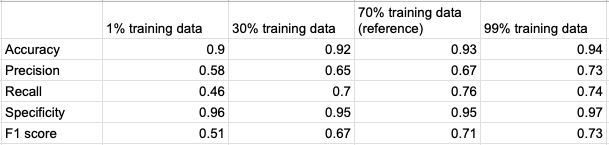

Choosing the right split of data into training and testing sets affects model accuracy. As the chart above shows, 1% training data causes the model to significantly underperform. The positive-class metrics get much better when using 30% training data compared to 1%, with more modest improvements when moving from 30% to 70%. The difference in metrics between 70% and 99% is even more modest; accuracy and specificy go up by 1%, F1 score goes up by 2%, and precision has the biggest gain at 4%. However, recall drops by 2% and we have less information about how the model will perform on unseen data, since the test set was much smaller. Keeping the amount of training data at around 70% seems the best choice of the different amounts tested.

##**Part 2: Subset of features included in the model**

In [ ]:
df.columns

Index(['amount', 'date', 'title', 'fico', 'dti', 'zip', 'state', 'emp_length',
       'policy_code', 'year', 'outcome', 'region', 'Region_is_midwest',
       'Region_is_northeast', 'Region_is_pacific_west', 'Region_is_plains',
       'Region_is_southeast', 'emp_length_numeric', 'is_debt_related'],
      dtype='object')

In [ ]:
#Main set of features to choose from: 'amount', 'fico', 'dti',
       #'Region_is_midwest','Region_is_northeast', 'Region_is_pacific_west', 'Region_is_plains','Region_is_southeast', 
       #'emp_length_numeric', 'is_debt_related'

#Subsets to try: 1) only regions, 2) only dti and is_debt_related, 3) only amount and emp_length_numeric, 4) all of the main features

In [ ]:
#Subset 0 (reference): Only features that seem most important based on previous analysis

X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")


The accuracy of the model is 0.93.
The precision of the model is 0.67.
The recall of the model is 0.76.
The specificity of the model is 0.95.
The F1 score of the model is 0.71.


In [ ]:
#Subset 1: Only region-related features

X = df.loc[:, ['Region_is_midwest','Region_is_northeast', 'Region_is_pacific_west', 'Region_is_plains','Region_is_southeast']]
y = df.policy_code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")


The accuracy of the model is 0.89.
The precision of the model is nan.
The recall of the model is 0.0.
The specificity of the model is 1.0.
The F1 score of the model is nan.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
#Subset 2: Only debt-related features

X = df.loc[:, ['dti', 'is_debt_related']]
y = df.policy_code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.89.
The precision of the model is 0.17.
The recall of the model is 0.0.
The specificity of the model is 1.0.
The F1 score of the model is 0.0.


In [ ]:
#Subset 3: Only amt and employment length

X = df.loc[:, ['amount', 'emp_length_numeric']]
y = df.policy_code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.9.
The precision of the model is 0.59.
The recall of the model is 0.38.
The specificity of the model is 0.97.
The F1 score of the model is 0.46.


In [ ]:
#Subset 4: Full feature set

X = df.loc[:, ['amount', 'fico', 'dti', 'Region_is_midwest','Region_is_northeast', 
'Region_is_pacific_west', 'Region_is_plains','Region_is_southeast', 
'emp_length_numeric', 'is_debt_related']]
y = df.policy_code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.93.
The precision of the model is 0.67.
The recall of the model is 0.75.
The specificity of the model is 0.95.
The F1 score of the model is 0.71.


###**Analysis**


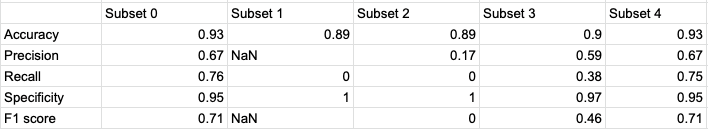

The choice of input features has a dramatic impact on the model performance.

Subset 1 contained only regional variables, which ultimately did not have any training advantage. The optimal decision tree in this case was an all-negative classifier. It still gave a fairly high accuracy (89%) because the data was heavily imbalanced.

Subset 2, which contained debt-to-income ratio metrics and indicated whether the title of the loan was about debt consolidation, only improved precision. The positive class was still performing poorly, with a recall and F1 score of 0.

Subset 3, which trained the model on the amount requested and employment length (numeric), did better than an all-negative model, but not nearly as well as the full feature set.

Subset 4, which included all features, performed almost exactly the same as the reference model. However, a number of the included features were redundant and unnecessary since they did not add to the training.

Sticking with Subset 0, the original reference model with the employment length (numeric) included, remains the best choice.

##**Part 3: Decision tree versus Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#Define data to use
X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

#Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

#Scale data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#Fit logistic regression model
#NOTE: different values of C and solver were tried; these turned out to be the best
lr = LogisticRegression(C=10, random_state=1, solver='liblinear')
lr = lr.fit(X_train,y_train)

#Generate performance metrics

predictions = lr.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.89.
The precision of the model is 0.51.
The recall of the model is 0.23.
The specificity of the model is 0.97.
The F1 score of the model is 0.32.


###**Analysis**


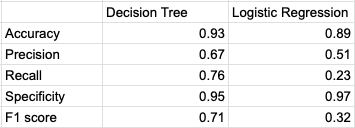

The best-performing logistic regression model could not match the decision tree with max depth of 10; it significantly underperformed in the positive class metrics. The only metric it improved was specificity (by 2 percentage points). The decision tree appears to be the better classifier for this problem.

##**Part 4: Hyperparameter tuning for the best-performing model from option 3**

In [ ]:
#The best model from option 3 was the decision tree using 70% training data 
#and the subset of features ["amount", "fico", "dti", "emp_length_numeric"].

#Hyperparameters to tune: criterion, max_depth, min_samples_split, min_samples_leaf, max_features
from sklearn.model_selection import GridSearchCV

X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

#Split the data into testing and training groups, with 30% designated as test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 10), 
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 4)
}

clf = DecisionTreeClassifier()

gs = GridSearchCV(clf, 
                  param_grid=param_grid, 
                  cv=10,
                  verbose=1,
                  n_jobs=1)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9267948513752835
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}


[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  1.9min finished


In [ ]:
#Run the model using these hyperparameters and generate performance metrics:


X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

clf = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=4)
clf = clf.fit(X_train,y_train)

#Generate performance metrics

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.93.
The precision of the model is 0.68.
The recall of the model is 0.76.
The specificity of the model is 0.95.
The F1 score of the model is 0.72.


###**Analysis**


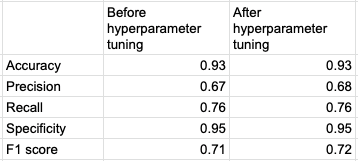

The best hyperparameters according to a brute force grid search are:

* 'criterion': 'gini' (matches default),
* 'max_depth': 9 (default is None), 
* 'min_samples_leaf': 2 (default = 1), 
* 'min_samples_split': 4 (default = 2)

In three out of four of the hyperparameters being tuned, the optimal value was different from the default value. Using these hyperparameters produced very small improvements in the precision and F1 scores (1 percentage point each). 

##**Part 5: Number of Folds for Cross Validation**



In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
#https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = df.loc[:, ["amount", "fico", "dti", "emp_length_numeric"]]
y = df.policy_code

clf = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=4)

#Define different numbers of folds to try
k_values = range(2, 10)

for k in k_values:
  kfold = KFold(n_splits = k, shuffle=True, random_state = 1)
  scores = cross_val_score(clf, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
  print(f'Accuracy for k = {k}: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
  f1scores = cross_val_score(clf, X, y, scoring='f1', cv=kfold, n_jobs=-1)
  print(f'F1-scores for k = {k}: %.3f (%.3f)' % (np.mean(f1scores), np.std(f1scores)))

Accuracy for k = 2: 0.925 (0.000)
F1-scores for k = 2: 0.689 (0.003)
Accuracy for k = 3: 0.926 (0.002)
F1-scores for k = 3: 0.690 (0.002)
Accuracy for k = 4: 0.927 (0.001)
F1-scores for k = 4: 0.695 (0.004)
Accuracy for k = 5: 0.928 (0.002)
F1-scores for k = 5: 0.696 (0.010)
Accuracy for k = 6: 0.928 (0.002)
F1-scores for k = 6: 0.698 (0.007)
Accuracy for k = 7: 0.928 (0.002)
F1-scores for k = 7: 0.699 (0.009)
Accuracy for k = 8: 0.928 (0.003)
F1-scores for k = 8: 0.698 (0.015)
Accuracy for k = 9: 0.928 (0.002)
F1-scores for k = 9: 0.698 (0.007)


###**Analysis**


In this case, it seems k=7 gave the optimally high accuracy and F1 scores. However, the difference between k=2 and k=7 was not very dramatic:

Accuracy for k = 2: 0.925 / Accuracy for k = 7: 0.928

F1-score for k = 2: 0.689 / F1-score for k = 7: 0.699


###**Comparative Analysis**



In order of most to least impact on model performance:


1.   Subset of features included in the model.
2.   Amount of data available for training.
3.   Decision tree vs. logistic regression classification.
4.   Hyperparameter tuning for the best-performing model.
5.   Number of folds or stratification strategy for cross-validation.

These are ranked according to how dramatically different the performance metrics, especially positive class performance metrics, varied based on different choices. The choice of subset of features could take the model from no learning at all (all-negative classifier with recall zero) to a recall of .76. The choice of amount of data available for training caused the F1 score to range from .51 to .73. Logistic regression seemed to perform worse than decision tree; accuracy with logistic regression was the same as an all-negative classifier (.89) compared to .93 with decision tree, and all the other metrics except specificity suffered as well. Hyperparameter tuning caused some tiny improvements in the metrics, with number of folds helping almost not at all.

# Question 3

Report the best-performing model and the total set of choices that you made in the options above to get to that level of performance. Compare that model performance to the result you reported in Homework 1. 

   - Describe one hypothetical business context for LendingClub where the amount of improvement reported in Question 3 would be worth the extra time and effort needed for optimization.
   - Describe one hypothetical business context where the improvement would **not** have been worth the extra time and effort.

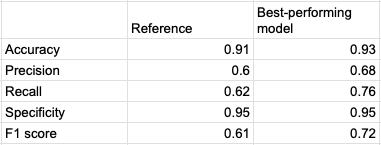

The best-performing model was a decision tree. The features used were ["amount", "fico", "dti", "emp_length_numeric"]. The model was trained on 70% of the available data and used the following hyperparameters: criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=4. 

Since 89% of the data belonged to the negative class, a jump in accuracy from .91 to .93 was somewhat significant. Precision, recall, and F1 score also got meaningful bumps, meaning the positive class predictions were improved the most by the model adjustments.

**Worth it**: This would be worth the optimization effort if business leaders were going to use it to help customers decide whether or not they should list their loan. Being better able to predict what results in a positive outcome can better inform an in-product feature that alerts users if their loan application is a good candidate.

**Not worth it**: If business leaders only wanted to know general trends about what kinds of people are likely to get successful loans, the difference in performance would not be worth the optimization. For instance, marketers would probably choose to target the same groups of people given either set of performance metrics.

# Extra Credit

For up to 2 points of extra credit, complete all three of the analyses in Question 1.

For up to 4 points of extra credit, complete all five of the analyses in Question 2.

# Scoring Rubric
![](https://drive.google.com/uc?export=view&id=1dLF4RcciHT_giZEXWio1D0hwK73tKYjK)

![](https://drive.google.com/uc?export=view&id=1nYN7X847FeHtE-0LVpqhQk8iq2YEWx2d)